# Visualize Raw Data

In [1]:
# general python modules for scientific analysis
import sys, pathlib, os
import numpy as np

# add the python path:
sys.path.append('../src')
from physion.utils import plot_tools as pt
from physion.analysis.read_NWB import Data, scan_folder_for_NWBfiles
from physion.dataviz.raw import plot as plot_raw

import warnings
warnings.filterwarnings("ignore") # disable the UserWarning from pynwb (arrays are not well oriented)

In [2]:
# load a datafile
filename = os.path.join(os.path.expanduser('~'), 
                        'CURATED', 'Pyr-FlexiCortPrelim-FebJuly2022', '2022_07_07-14-45-08.nwb')
data = Data(filename,
            verbose=False)
data.build_rawFluo(verbose=False)

## Showing Field of View

(<Figure size 255x195 with 1 Axes>,
 <Axes: title={'center': 'meanImg'}>,
 <matplotlib.image.AxesImage at 0x2cb6f5690>)

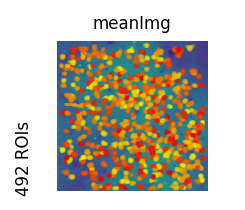

In [5]:
from physion.dataviz.imaging import show_CaImaging_FOV
_ = show_CaImaging_FOV(data, key='meanImg', 
                       NL=3, 
                       roiIndices=range(data.nROIs))

In [52]:
fig.savefig('/Users/yann/Desktop/fig.svg')